[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/source/image_stitching.ipynb)

# Image rotation using OpenCV


Now let's download the images

In [1]:
# UplLoad images from local disk

from google.colab import files
uploaded = files.upload()

# upload the image with umbrellas and logo

Saving umbrellas.jpg to umbrellas.jpg


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  94458      0 --:--:-- --:--:-- --:--:-- 96468


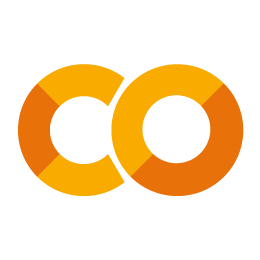

In [84]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
logo = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(logo)

(667, 1000, 3)


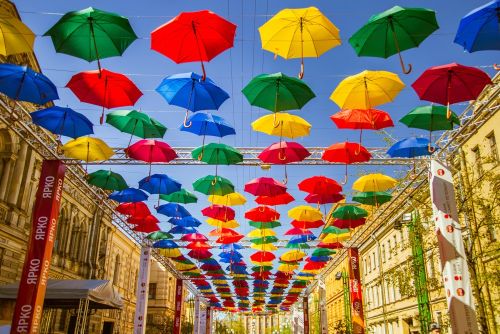

(334, 500, 3)


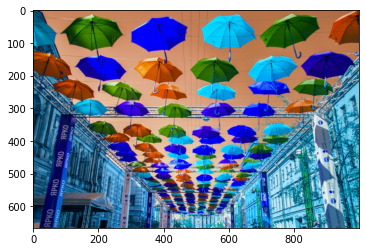

In [95]:
# Let's show the image & resize it

import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

img1 = cv2.imread('umbrellas.jpg')

print(img1.shape)

scale_factor = 0.5
img_resized = cv2.resize(img1, None, fx= scale_factor, fy= scale_factor, interpolation= cv2.INTER_LINEAR)  # Resized the original image


#plt.subplots(1, figsize = (16,9))
plt.imshow(img1)
#plt.title("Original image")

#cv2_imshow(img1)
cv2_imshow(img_resized)  
print(img_resized.shape)

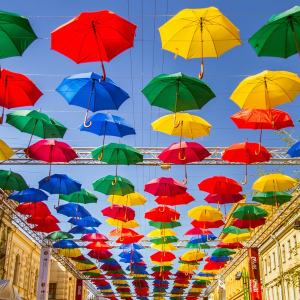

(300, 300, 3)


In [65]:
# Let's crop the image 

cropped_image = img_resized[0:300, 100:400]
cv2_imshow(cropped_image)
print(cropped_image.shape)

(150.0, 150.0)
[[  0.70710678   0.70710678 -62.13203436]
 [ -0.70710678   0.70710678 150.        ]]


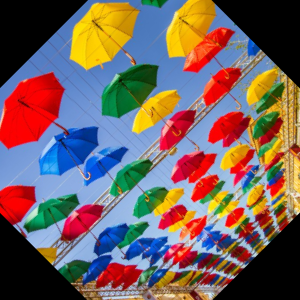

In [104]:
# Let's rotate the image 

# dividing height and width by 2 to get the center of the image
height, width = cropped_image.shape[:2]

center = (width/2, height/2)
#center = (0, 0)
print(center)

# using cv2.getRotationMatrix2D() to get the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=45, scale=1)
print(rotate_matrix)

# rotate the image using cv2.warpAffine
rotated_image = cv2.warpAffine(src=cropped_image, M=rotate_matrix, dsize=(width, height))

cv2_imshow(rotated_image)

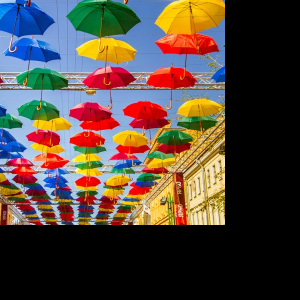

In [105]:
# Let's translate the image
tx, ty = width / 4, height / 4    # get tx and ty values for translation

# create the translation matrix using tx and ty, it is a NumPy array 
translation_matrix = np.array([
    [1, 0, -tx],
    [0, 1, -ty]
], dtype=np.float32)

# apply the translation to the image
translated_image = cv2.warpAffine(src=cropped_image, M=translation_matrix, dsize=(width, height))

cv2_imshow(translated_image)

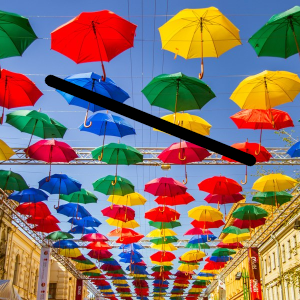

In [111]:
# Let's annotate the image: draw a line

# Draw line on image
imageLine = cropped_image.copy()
#Draw the image from point A to B
pointA = (50,80)
pointB = (250,160)
cv2.line(imageLine, pointA, pointB, (0, 0, 0), thickness=10, lineType=cv2.LINE_AA)
cv2_imshow(imageLine)

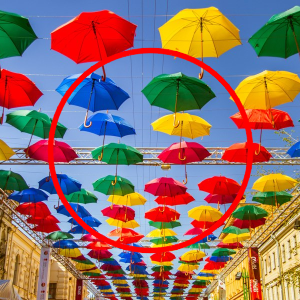

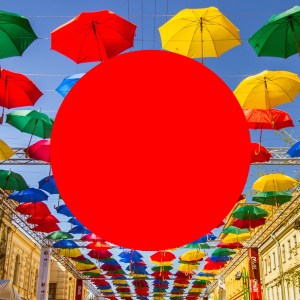

In [52]:
# Let's annotate the image: draw a circle

# Draw circle on image
imageCircle = cropped_image.copy()
# define the center of circle
circle_center = (150,150)
# define the radius of the circle
radius =100
#  Draw a circle using the circle() Function
cv2.circle(imageCircle, circle_center, radius, (0, 0, 255), thickness=3, lineType=cv2.LINE_AA)
cv2_imshow(imageCircle)

imageFilledCircle = cropped_image.copy()
cv2.circle(imageFilledCircle, circle_center, radius, (0, 0, 255), thickness=-1, lineType=cv2.LINE_AA)
cv2_imshow(imageFilledCircle)

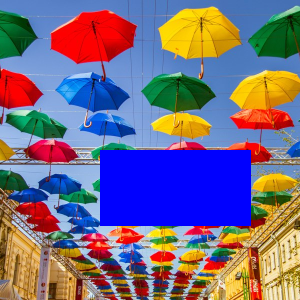

In [113]:
# Let's annotate the image: draw a rectangle

# make a copy of the original image
imageRectangle = cropped_image.copy()
# define the starting and end points of the rectangle
start_point = (100,150)
end_point   = (250,225)
# draw the rectangle
cv2.rectangle(imageRectangle, start_point, end_point, (255, 0, 0), thickness= -1, lineType=cv2.LINE_8) 
# display the output
cv2_imshow(imageRectangle)

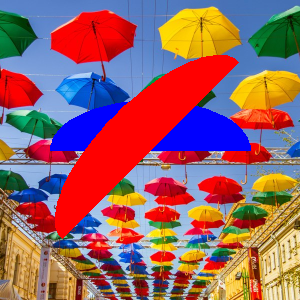

In [118]:
# Let's annotate the image: draw an ellipse

# make a copy of the original image
imageEllipse = cropped_image.copy()
# define the center point of ellipse
ellipse_center = (250,250)
# define the major and minor axes of the ellipse
axis1 = (100,50)
axis2 = (125,50)
# draw the ellipse
#Horizontal
cv2.ellipse(imageEllipse, (150,150), axis1, 0, 180, 360, (255, 0, 0), thickness=-1)
#Vertical
cv2.ellipse(imageEllipse, (150,150), axis2, 135, 0, 180, (0, 0, 255), thickness=-1)
# display the output
cv2_imshow(imageEllipse)

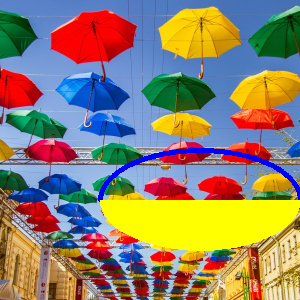

In [69]:
# Let's annotate the image: draw a semi-ellipse

# make a copy of the original image
halfEllipse = cropped_image.copy()
# define the center of half ellipse
ellipse_center = (200,200)
# define the axis point
axis1 = (100,50)
# draw the Incomplete/Open ellipse, just a outline
cv2.ellipse(halfEllipse, ellipse_center, axis1, 0, 180, 360, (255, 0, 0), thickness=3)
# if you want to draw a Filled ellipse, use this line of code
cv2.ellipse(halfEllipse, ellipse_center, axis1, 0, 0, 180, (0, 255, 255), thickness=-2)
# display the output
cv2_imshow(halfEllipse)

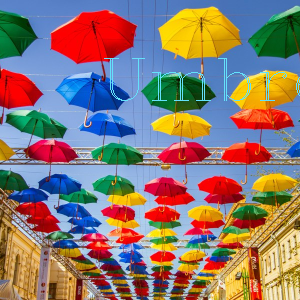

In [121]:
# Let's annotate the image: write a text on the image

# make a copy of the original image
imageText = cropped_image.copy()
#let's write the text you want to put on the image
text = 'Umbrellas!!'
#org: Where you want to put the text
org = (100,100)
# write the text on the input image
cv2.putText(imageText, text, org, fontFace = cv2.FONT_HERSHEY_COMPLEX, fontScale = 2, color = (250,225,100))
# display the output image with text over it
cv2_imshow(imageText)

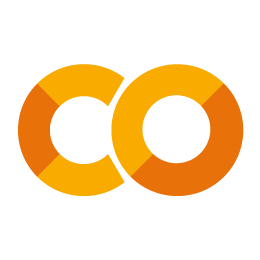

In [85]:
# Let's warp the image

img_warp = logo.copy()

# display the output image warped logo
cv2_imshow(img_warp)

In [87]:
def draw_circle(event, x, y, flags, param):
  global mouseX, mouseY
  if event == cv2.EVENT_LBUTTONDBLCLK:
    cv2.circle(img_warp, (x, y), 3, (255, 255, 0), -1)
    mouseX, mouseY = x, y

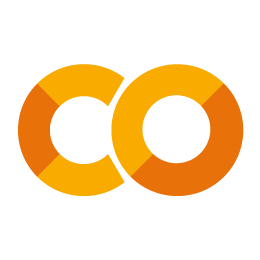

error: ignored

In [88]:
cv2_imshow(img_warp)
cv2.setMouseCallback('img_warp', draw_circle)

In [ ]:
while(1):
  cv2_imshow(img_warp)
  k = cv2.waitKey(20) & 0xFF
  if k == 27:     #ESC button in ASCII
    break
  if k == ord('1'):
    x1 = mouseX, mouseY
    print(x1)
  if k == ord('2'):

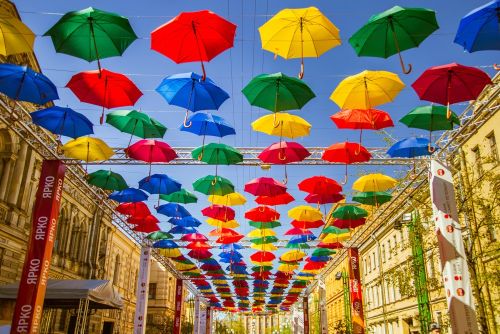

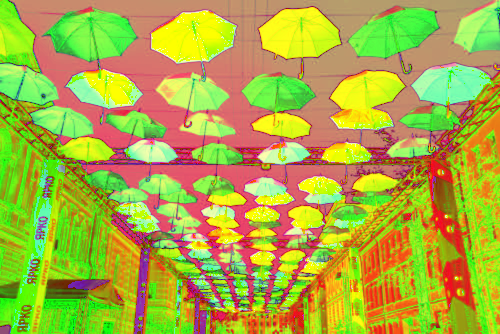

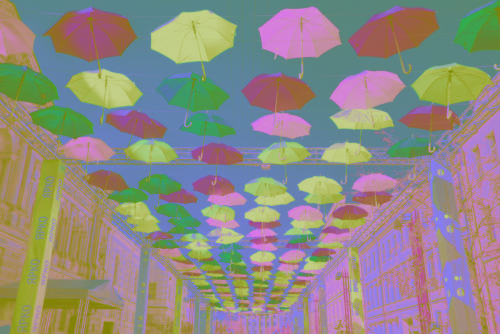

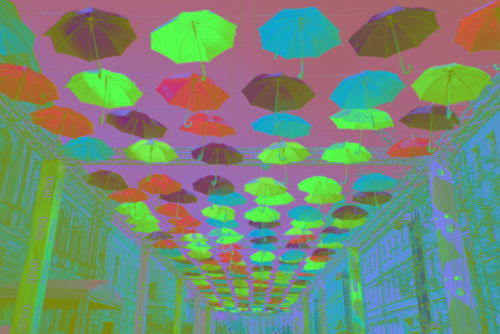

In [122]:
#Color spaces

cv2_imshow(img_resized)
image_hsv = cv2.cvtColor(img_resized, cv2.COLOR_BGR2HSV)
lab_image = cv2.cvtColor(img_resized, cv2.COLOR_BGR2LAB)
yCrCb_image = cv2.cvtColor(img_resized, cv2.COLOR_BGR2YCrCb)

cv2_imshow(image_hsv)
cv2_imshow(lab_image)
cv2_imshow(yCrCb_image)

In [102]:
	
#vid_capture = cv2.VideoCapture(0, cv2.CAP_DSHOW)

In [106]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [123]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored